# Libraries

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.colors
import pandas as pd
import numpy as np
import sklearn.preprocessing
import sklearn.cross_validation
import sklearn.decomposition
import sklearn.linear_model
import sklearn.neighbors
import sklearn.svm
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.metrics

# Read data

In [2]:
work_dir='/home/ggomarr/Documents/Education/20170623 Udemy - Machine Learning A-Z: Hands-On Python and R in Data Science/' + \
         'Course data/Part 9 - Dimensionality Reduction/Section 43 - Principal Component Analysis (PCA)/'
df=pd.read_csv(work_dir+'Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [7]:
X=df.drop('Customer_Segment',axis=1).values
Y=df['Customer_Segment'].values
X[:5],Y[:5]

(array([[  1.42300000e+01,   1.71000000e+00,   2.43000000e+00,
           1.56000000e+01,   1.27000000e+02,   2.80000000e+00,
           3.06000000e+00,   2.80000000e-01,   2.29000000e+00,
           5.64000000e+00,   1.04000000e+00,   3.92000000e+00,
           1.06500000e+03],
        [  1.32000000e+01,   1.78000000e+00,   2.14000000e+00,
           1.12000000e+01,   1.00000000e+02,   2.65000000e+00,
           2.76000000e+00,   2.60000000e-01,   1.28000000e+00,
           4.38000000e+00,   1.05000000e+00,   3.40000000e+00,
           1.05000000e+03],
        [  1.31600000e+01,   2.36000000e+00,   2.67000000e+00,
           1.86000000e+01,   1.01000000e+02,   2.80000000e+00,
           3.24000000e+00,   3.00000000e-01,   2.81000000e+00,
           5.68000000e+00,   1.03000000e+00,   3.17000000e+00,
           1.18500000e+03],
        [  1.43700000e+01,   1.95000000e+00,   2.50000000e+00,
           1.68000000e+01,   1.13000000e+02,   3.85000000e+00,
           3.49000000e+00,   2.400

# Clean up missing data

In [8]:
sum(X!=X),sum(np.isnan(Y))

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]), 0)

# Feature scaling

In [9]:
X_scaler=sklearn.preprocessing.StandardScaler().fit(X)
X_scaled=X_scaler.transform(X)
X_scaled[:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

# Train/test split

In [19]:
X_all_train,X_all_test,Y_train,Y_test=sklearn.cross_validation.train_test_split(X_scaled,Y,
                                                                                test_size=0.2,random_state=0)
X_all_train.shape,X_all_test.shape

((142, 13), (36, 13))

# PCA

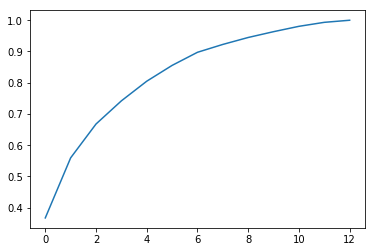

 1: 0.37
 2: 0.56
 3: 0.67
 4: 0.74
 5: 0.80
 6: 0.86
 7: 0.90
 8: 0.92
 9: 0.94
10: 0.96
11: 0.98
12: 0.99
13: 1.00


In [26]:
pca=sklearn.decomposition.PCA(n_components=None).fit(X_all_train)
sum_explained_variance=np.cumsum(pca.explained_variance_ratio_)
plt.plot(sum_explained_variance)
plt.show()
for n in range(pca.n_components_):
    print('{:2d}: {:0.2f}'.format(n+1,sum_explained_variance[n]))

In [28]:
n_components=2
pca=sklearn.decomposition.PCA(n_components=n_components).fit(X_all_train)
X_train=pca.transform(X_all_train)
X_test=pca.transform(X_all_test)
X_train.shape,X_test.shape

((142, 2), (36, 2))

# Classifiers

In [71]:
model_classes={
                '01 - Logistic Regression':{ 'model':sklearn.linear_model.LogisticRegression,
                                             'params':{} },
                '02 - Nearest Neighbors [5 neighbors]':{ 'model':sklearn.neighbors.KNeighborsClassifier,
                                                         'params':{'n_neighbors':5,
                                                                   'metric':'minkowski',
                                                                   'p':2} },
                '03 - SVM linear': { 'model':sklearn.svm.SVC,
                                     'params':{'kernel':'linear'} },
                '04 - SVM poly':   { 'model':sklearn.svm.SVC,
                                     'params':{'kernel':'poly'} },
                '05 - SVM rbf':    { 'model':sklearn.svm.SVC,
                                     'params':{'kernel':'rbf'} },
                '06 - SVM sigmoid':{ 'model':sklearn.svm.SVC,
                                     'params':{'kernel':'sigmoid'} },
                '07 - GaussianNB':{ 'model':sklearn.naive_bayes.GaussianNB,
                                'params':{} },
                '08 - Decision Tree':{ 'model':sklearn.tree.DecisionTreeClassifier,
                                       'params':{'criterion':'entropy',
                                                 'random_state':0} },
                '09 - Random forest 1 [10 trees]':{ 'model':sklearn.ensemble.RandomForestClassifier,
                                                    'params':{'criterion':'entropy',
                                                              'n_estimators':10,
                                                              'random_state':0} },
                '10 - Random forest 2 [100 trees]':{ 'model':sklearn.ensemble.RandomForestClassifier,
                                                     'params':{'criterion':'entropy',
                                                               'n_estimators':100,
                                                               'random_state':0} },
              }

In [72]:
def range_plot_X(X,num=100,ext=0.1):
    max_X,min_X=max(X),min(X)
    delta=max_X-min_X
    max_X,min_X=max_X+ext*delta,min_X-ext*delta
    delta=(max_X-min_X)/(num-1)
    return np.array(np.arange(min_X,max_X+delta,delta)[:num].reshape((num,1)))

In [73]:
X_plot,Y_plot=np.meshgrid(range_plot_X(X_train[:,0],num=1000),range_plot_X(X_train[:,1],num=1000))
cmap_lst=('red','green','blue')

=== 01 - Logistic Regression ===

Score:
Train 0.96 - Test 0.97

Train

Confusion matrix:
[[43  2  0]
 [ 2 52  1]
 [ 0  0 42]]

Classification report:
             precision    recall  f1-score   support

          1       0.96      0.96      0.96        45
          2       0.96      0.95      0.95        55
          3       0.98      1.00      0.99        42

avg / total       0.96      0.96      0.96       142



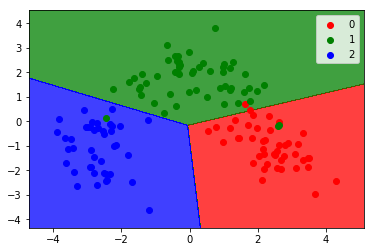


Test

Confusion matrix:
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]

Classification report:
             precision    recall  f1-score   support

          1       0.93      1.00      0.97        14
          2       1.00      0.94      0.97        16
          3       1.00      1.00      1.00         6

avg / total       0.97      0.97      0.97        36



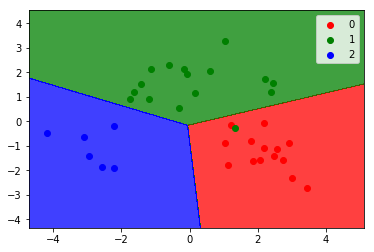

=== 02 - Nearest Neighbors [5 neighbors] ===

Score:
Train 0.97 - Test 0.97

Train

Confusion matrix:
[[45  0  0]
 [ 2 52  1]
 [ 0  1 41]]

Classification report:
             precision    recall  f1-score   support

          1       0.96      1.00      0.98        45
          2       0.98      0.95      0.96        55
          3       0.98      0.98      0.98        42

avg / total       0.97      0.97      0.97       142



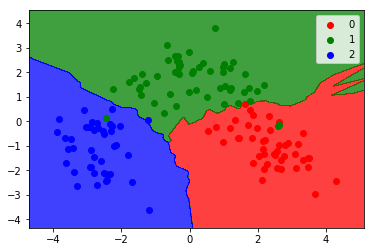


Test

Confusion matrix:
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]

Classification report:
             precision    recall  f1-score   support

          1       0.93      1.00      0.97        14
          2       1.00      0.94      0.97        16
          3       1.00      1.00      1.00         6

avg / total       0.97      0.97      0.97        36



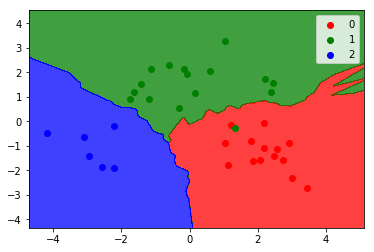

=== 03 - SVM linear ===

Score:
Train 0.97 - Test 0.97

Train

Confusion matrix:
[[44  1  0]
 [ 2 52  1]
 [ 0  0 42]]

Classification report:
             precision    recall  f1-score   support

          1       0.96      0.98      0.97        45
          2       0.98      0.95      0.96        55
          3       0.98      1.00      0.99        42

avg / total       0.97      0.97      0.97       142



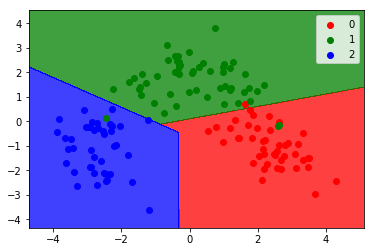


Test

Confusion matrix:
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]

Classification report:
             precision    recall  f1-score   support

          1       0.93      1.00      0.97        14
          2       1.00      0.94      0.97        16
          3       1.00      1.00      1.00         6

avg / total       0.97      0.97      0.97        36



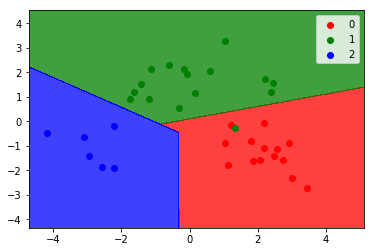

=== 04 - SVM poly ===

Score:
Train 0.95 - Test 0.94

Train

Confusion matrix:
[[43  2  0]
 [ 3 51  1]
 [ 1  0 41]]

Classification report:
             precision    recall  f1-score   support

          1       0.91      0.96      0.93        45
          2       0.96      0.93      0.94        55
          3       0.98      0.98      0.98        42

avg / total       0.95      0.95      0.95       142



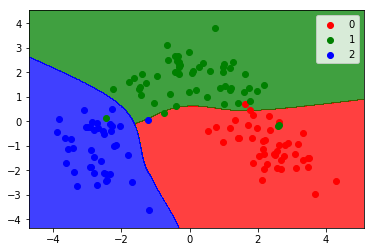


Test

Confusion matrix:
[[14  0  0]
 [ 2 14  0]
 [ 0  0  6]]

Classification report:
             precision    recall  f1-score   support

          1       0.88      1.00      0.93        14
          2       1.00      0.88      0.93        16
          3       1.00      1.00      1.00         6

avg / total       0.95      0.94      0.94        36



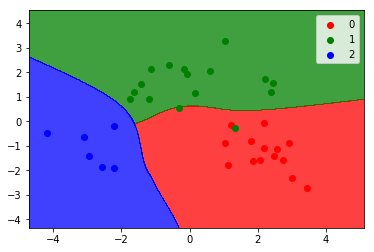

=== 05 - SVM rbf ===

Score:
Train 0.96 - Test 0.97

Train

Confusion matrix:
[[44  1  0]
 [ 2 52  1]
 [ 0  1 41]]

Classification report:
             precision    recall  f1-score   support

          1       0.96      0.98      0.97        45
          2       0.96      0.95      0.95        55
          3       0.98      0.98      0.98        42

avg / total       0.96      0.96      0.96       142



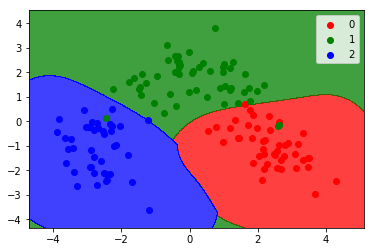


Test

Confusion matrix:
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]

Classification report:
             precision    recall  f1-score   support

          1       0.93      1.00      0.97        14
          2       1.00      0.94      0.97        16
          3       1.00      1.00      1.00         6

avg / total       0.97      0.97      0.97        36



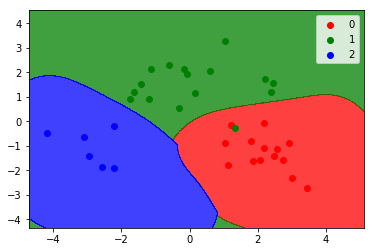

=== 06 - SVM sigmoid ===

Score:
Train 0.87 - Test 0.78

Train

Confusion matrix:
[[45  0  0]
 [10 37  8]
 [ 1  0 41]]

Classification report:
             precision    recall  f1-score   support

          1       0.80      1.00      0.89        45
          2       1.00      0.67      0.80        55
          3       0.84      0.98      0.90        42

avg / total       0.89      0.87      0.86       142



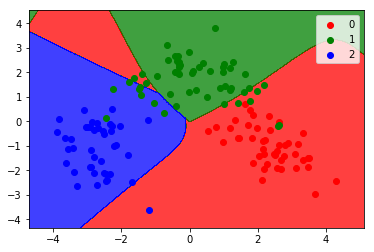


Test

Confusion matrix:
[[14  0  0]
 [ 5  8  3]
 [ 0  0  6]]

Classification report:
             precision    recall  f1-score   support

          1       0.74      1.00      0.85        14
          2       1.00      0.50      0.67        16
          3       0.67      1.00      0.80         6

avg / total       0.84      0.78      0.76        36



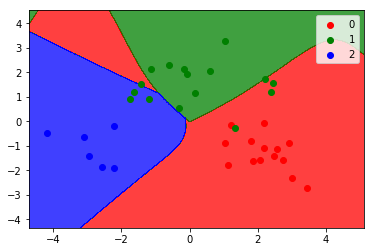

=== 07 - GaussianNB ===

Score:
Train 0.96 - Test 0.97

Train

Confusion matrix:
[[44  1  0]
 [ 2 52  1]
 [ 0  1 41]]

Classification report:
             precision    recall  f1-score   support

          1       0.96      0.98      0.97        45
          2       0.96      0.95      0.95        55
          3       0.98      0.98      0.98        42

avg / total       0.96      0.96      0.96       142



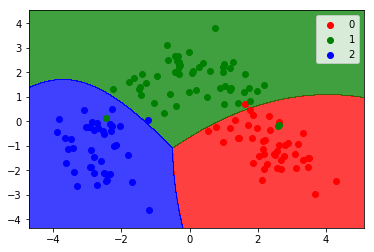


Test

Confusion matrix:
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]

Classification report:
             precision    recall  f1-score   support

          1       0.93      1.00      0.97        14
          2       1.00      0.94      0.97        16
          3       1.00      1.00      1.00         6

avg / total       0.97      0.97      0.97        36



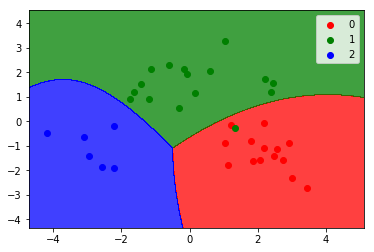

=== 08 - Decision Tree ===

Score:
Train 1.00 - Test 0.97

Train

Confusion matrix:
[[45  0  0]
 [ 0 55  0]
 [ 0  0 42]]

Classification report:
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        45
          2       1.00      1.00      1.00        55
          3       1.00      1.00      1.00        42

avg / total       1.00      1.00      1.00       142



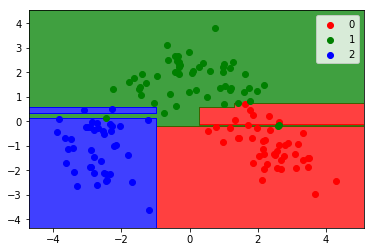


Test

Confusion matrix:
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]

Classification report:
             precision    recall  f1-score   support

          1       0.93      1.00      0.97        14
          2       1.00      0.94      0.97        16
          3       1.00      1.00      1.00         6

avg / total       0.97      0.97      0.97        36



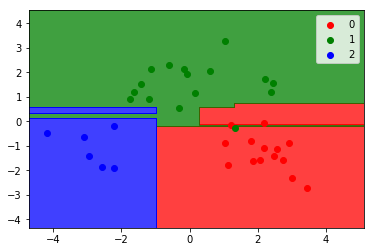

=== 09 - Random forest 1 [10 trees] ===

Score:
Train 0.99 - Test 0.97

Train

Confusion matrix:
[[45  0  0]
 [ 0 55  0]
 [ 0  1 41]]

Classification report:
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        45
          2       0.98      1.00      0.99        55
          3       1.00      0.98      0.99        42

avg / total       0.99      0.99      0.99       142



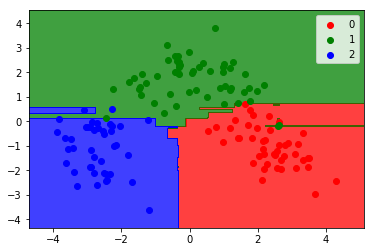


Test

Confusion matrix:
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]

Classification report:
             precision    recall  f1-score   support

          1       0.93      1.00      0.97        14
          2       1.00      0.94      0.97        16
          3       1.00      1.00      1.00         6

avg / total       0.97      0.97      0.97        36



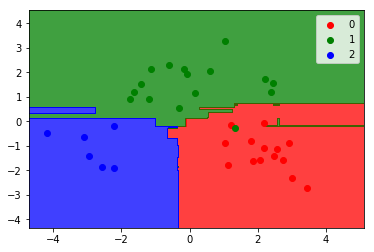

=== 10 - Random forest 2 [100 trees] ===

Score:
Train 1.00 - Test 0.97

Train

Confusion matrix:
[[45  0  0]
 [ 0 55  0]
 [ 0  0 42]]

Classification report:
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        45
          2       1.00      1.00      1.00        55
          3       1.00      1.00      1.00        42

avg / total       1.00      1.00      1.00       142



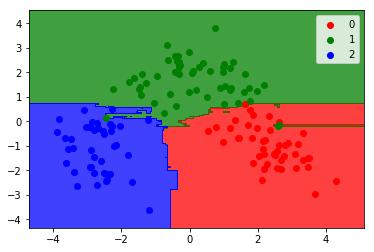


Test

Confusion matrix:
[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]

Classification report:
             precision    recall  f1-score   support

          1       0.93      1.00      0.97        14
          2       1.00      0.94      0.97        16
          3       1.00      1.00      1.00         6

avg / total       0.97      0.97      0.97        36



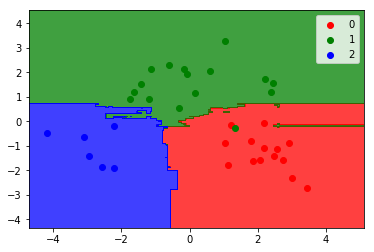

In [74]:
for class_name in sorted(model_classes):
    print('=== {} ==='.format(class_name))
    model_class=model_classes[class_name]['model']
    params=model_classes[class_name]['params']
    model=model_class(**params).fit(X_train,Y_train)
    print('\nScore:')
    print('Train {:0.2f} - Test {:0.2f}'.format(model.score(X_train,Y_train),model.score(X_test,Y_test)))
    print('\nTrain')
    print('\nConfusion matrix:')
    print(sklearn.metrics.confusion_matrix(Y_train,model.predict(X_train)))
    print('\nClassification report:')
    print(sklearn.metrics.classification_report(Y_train,model.predict(X_train)))
    cont=model.predict(np.array([X_plot.ravel(),Y_plot.ravel()]).T).reshape(X_plot.shape)
    plt.contourf(X_plot,Y_plot,cont,alpha=0.75,cmap=matplotlib.colors.ListedColormap(cmap_lst))
    for n in range(len(cmap_lst)):
        plt.scatter(X_train[Y_train==n+1,0],X_train[Y_train==n+1,1],c=cmap_lst[n],label=n)
    plt.legend()
    plt.show()
    print('\nTest')
    print('\nConfusion matrix:')
    print(sklearn.metrics.confusion_matrix(Y_test,model.predict(X_test)))
    print('\nClassification report:')
    print(sklearn.metrics.classification_report(Y_test,model.predict(X_test)))
    plt.contourf(X_plot,Y_plot,cont,alpha=0.75,cmap=matplotlib.colors.ListedColormap(cmap_lst))
    for n in range(len(cmap_lst)):
        plt.scatter(X_test[Y_test==n+1,0],X_test[Y_test==n+1,1],c=cmap_lst[n],label=n)
    plt.legend()
    plt.show()